# CNN Food Non-Food Classifier Food Non-Food Classifier
By: Reza Yogaswara
____

In [1]:
!apt-get update

Get:1 http://security.ubuntu.com/ubuntu artful-security InRelease [83.2 kB]
Hit:2 http://archive.ubuntu.com/ubuntu artful InRelease
Get:3 http://archive.ubuntu.com/ubuntu artful-updates InRelease [88.7 kB]
Get:4 http://security.ubuntu.com/ubuntu artful-security/universe Sources [20.5 kB]
Get:5 http://security.ubuntu.com/ubuntu artful-security/main amd64 Packages [222 kB]
Get:6 http://archive.ubuntu.com/ubuntu artful-backports InRelease [74.6 kB]
Get:7 http://security.ubuntu.com/ubuntu artful-security/multiverse amd64 Packages [1,815 B]
Get:8 http://security.ubuntu.com/ubuntu artful-security/restricted amd64 Packages [2,933 B]
Get:9 http://security.ubuntu.com/ubuntu artful-security/universe amd64 Packages [78.1 kB]
Get:10 http://archive.ubuntu.com/ubuntu artful-updates/universe Sources [43.2 kB]
Get:11 http://archive.ubuntu.com/ubuntu artful-updates/restricted amd64 Packages [2,933 B]
Get:12 http://archive.ubuntu.com/ubuntu artful-updates/universe amd64 Packages [141 kB]
Get:13 http://a

In [2]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse tree
!pip install livelossplot

!pip install keras_sequential_ascii

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18298 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .../0


Creating config file /etc/apt/apt.conf.d/50unattended-upgrades with new version
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up dirmngr (2.1.15-1ubuntu8) ...
Setting up cron (3.0pl1-128ubuntu5) ...
Adding group `crontab' (GID 102) ...
Done.
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
update-rc.d: warning: stop runlevel arguments (1) do not match cron Default-Stop values (none)
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Setting up kmod (24-1ubuntu2) ...
Setting up libdbus-glib-1-2:amd64 (0.108-2) ...
Setting up python3-gi (3.24.1-2build1) ...
Setting up module-init-tools (24-1ubuntu2) ...
Setting up python3-software-properties (0.96.24.17) ...
Setting up dbus (1.10.22-1ubuntu1) ...
Setting up python-apt (1.4.0~beta3build2) ...
Setting up python3-dbus (1.2.4-1buil

  Running setup.py bdist_wheel for keras-sequential-ascii ... - done
  Stored in directory: /content/.cache/pip/wheels/f5/8d/81/912666dff82a923ce423a7e797cd75f54271c7031512cdb282
Successfully built keras-sequential-ascii


In [3]:
# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()
# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [6]:
# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

PATH = './drive/Colab\ Notebooks/Riset4PaperKM/Food-5K/'

print ('Files in Drive:')
!ls {PATH}

files = !ls {PATH}training/ | head
files

# Create a file in Drive.
# !tree


#!echo "This newly created file will appear in your Drive file list." > drive/created.txt

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option
Files in Drive:
evaluation  training  validation


['food', 'non-food']

In [7]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation, Dropout
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam, Adadelta, RMSprop, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import livelossplot
%matplotlib inline
plot_losses = livelossplot.PlotLossesKeras()

Using TensorFlow backend.


NameError: ignored

In [6]:
train_path = '%straining/' %PATH
valid_path = '%svalidation/' %PATH
test_path = '%sevaluation/' %PATH

classes = ('food', 'non-food')

print (train_path)

./drive/ColabNotebooks/Riset4PaperKM/Food-5K/training/


In [7]:
train_batches = ImageDataGenerator(rescale = 1./255, shear_range=0.2,       # randomly applies shearing transformation
        zoom_range=0.2,        # randomly applies shearing transformation
        horizontal_flip=True).flow_from_directory(train_path, target_size=(224,224), 
        class_mode='binary', batch_size=32)
valid_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(valid_path, target_size=(224,224), 
        class_mode='binary', batch_size=16)
test_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(test_path, target_size=(224,224), 
        class_mode='binary', batch_size=16)

nb_train_samples = 3001
nb_validation_samples = 1000

Found 3001 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


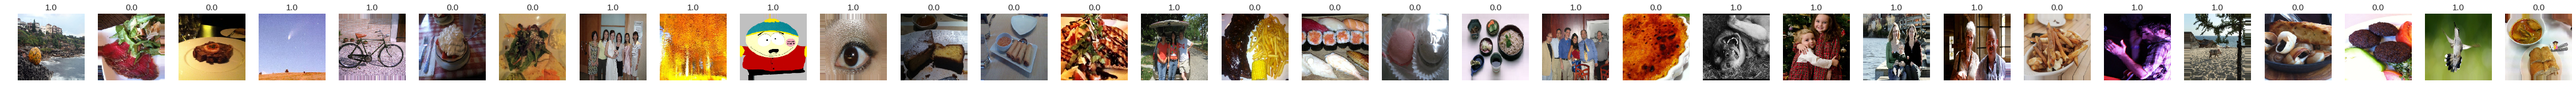

In [8]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(80,60), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        #print(ims[0])
        #ims = np.array(ims).astype(np.uint8)
        #print(ims)
        
        if (ims.shape[-1] != 3):
            ims = ims.transpose((1,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=15)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        
imgs, labels = next(train_batches)
plots(imgs, titles=labels)

# Build and train CNN

In [9]:
pool_size = (2, 2)                  # size of pooling area for max pooling
prob_drop_conv = 0.2                # drop probability for dropout @ conv layer
prob_drop_hidden = 0.5              # drop probability for dropout @ fc layer

# Convolutional model
model = Sequential()

#initializer = initializers.random_normal(stddev=0.02)
initializer = 'normal'

# conv1 layer
model.add(Conv2D(100, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_initializer=initializer))
model.add(MaxPooling2D(pool_size=pool_size ))
#model.add(Dropout(prob_drop_conv))

# conv2 layer
model.add(Conv2D(200, (3, 3), activation='relu', kernel_initializer=initializer))
model.add(MaxPooling2D(pool_size=pool_size))
#model.add(Dropout(prob_drop_conv))

# conv3 layer
model.add(Conv2D(300, (3, 3), activation='relu', kernel_initializer=initializer))
model.add(MaxPooling2D(pool_size=pool_size ))
model.add(Flatten())
#model.add(Dropout(prob_drop_conv))

# fc1 layer
model.add(Dense(500, activation='relu', kernel_initializer=initializer))
model.add(Dropout(prob_drop_hidden))

# fc2 layer
model.add(Dense(10, activation='relu', kernel_initializer=initializer))
model.add(Dropout(prob_drop_hidden))

# fc3 layer
model.add(Dense(1, activation='sigmoid', kernel_initializer=initializer))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 100)     2800      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 100)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 200)     180200    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 200)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 300)       540300    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 300)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 202800)            0         
__________

In [10]:
# Vizualizing model structure

sequential_model_to_ascii_printout(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    224  224    3
              Conv2D    \|/  -------------------      2800     0.0%
                relu   #####    222  222  100
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####    111  111  100
              Conv2D    \|/  -------------------    180200     0.2%
                relu   #####    109  109  200
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     54   54  200
              Conv2D    \|/  -------------------    540300     0.5%
                relu   #####     52   52  300
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     26   26  300
             Flatten   ||||| -------------------         0     0.0%
                       #####      202800
               Dense   XXXXX ------------------- 101400500    99.3%
                rel

In [0]:
#model.compile(Adadelta(), loss='binary_crossentropy', metrics=['accuracy', 'mean_squared_error'])
model.compile(RMSprop(), loss='binary_crossentropy', metrics=['accuracy', 'mean_squared_error'])
#model.compile(SGD(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy', 'mean_squared_error'])

In [12]:
'''
history = model.fit_generator(train_batches, steps_per_epoch=32, #steps_per_epoch=nb_train_samples, 
                         callbacks=[plot_losses],
                              validation_steps = 32,
                    validation_data=valid_batches, epochs=50, verbose=2)
'''

batch_size = 32
epochs = 20

history = model.fit_generator(train_batches,
                         steps_per_epoch = batch_size,
                         epochs = epochs,
                         callbacks=[plot_losses],
                         validation_data = valid_batches,
                                  verbose = 1)


Epoch 1/20
 2/32 [>.............................] - ETA: 12:14 - loss: 1.1828 - acc: 0.4375 - mean_squared_error: 0.3478

KeyboardInterrupt: ignored

In [13]:
# Evaluate
x_test, y_test = valid_batches[0]
evaluation = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

16/16 [==============================] - 0s 8ms/step
Summary: Loss over the test dataset: 0.61, Accuracy: 0.69


dict_keys(['val_loss', 'val_acc', 'val_mean_squared_error', 'loss', 'acc', 'mean_squared_error'])


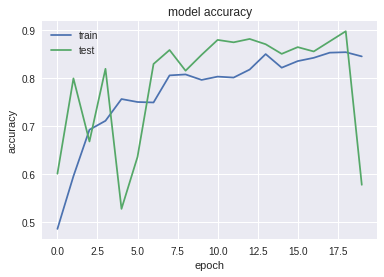

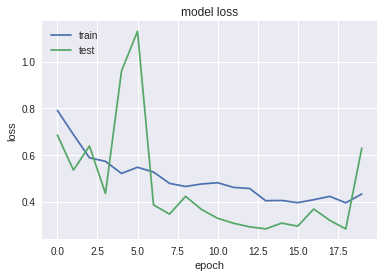

In [14]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
model.evaluate_generator(valid_batches, nb_validation_samples)

[0.6287250888888122, 0.5775188916876575, 0.21097465661408318]

# Predict

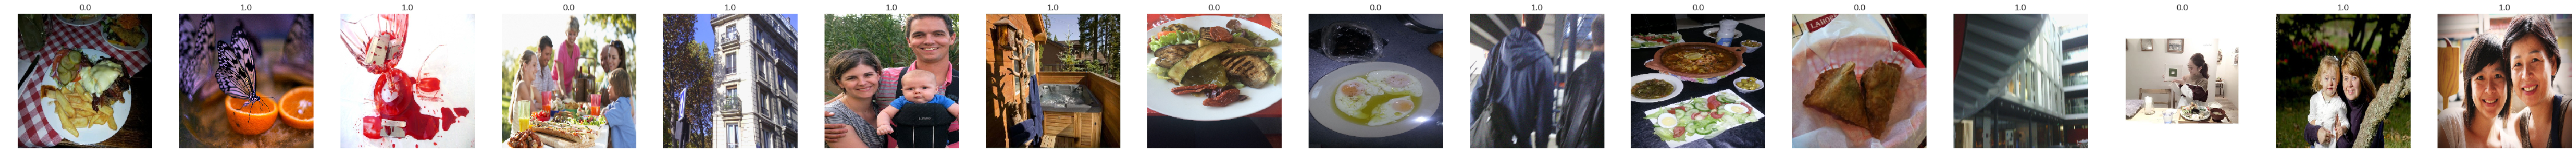

In [16]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [17]:
test_labels = test_labels[:,0]
test_labels

IndexError: ignored

In [0]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [26]:
predictions

array([[0.17150761, 0.8281589 ],
       [0.6930683 , 0.31336105],
       [0.10489819, 0.89131504],
       [0.60961354, 0.3949501 ],
       [0.81363565, 0.18266064],
       [0.8119126 , 0.19564374],
       [0.9529424 , 0.04738311],
       [0.4738807 , 0.52539825]], dtype=float32)

In [27]:
cm = confusion_matrix(test_labels, predictions[:,0])

ValueError: ignored

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0 6]
 [0 4]]


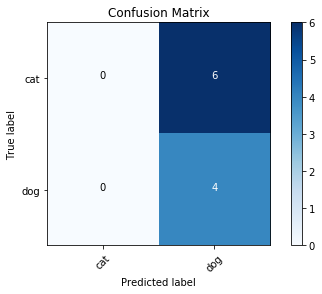

In [0]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

## Build Fine-tuned VGG16 model

In [0]:
#vgg16_model = keras.applications.vgg16.VGG16(weights=None,classes=len(classes),input_shape=(300, 300, 3))
vgg16_model = keras.applications.vgg16.VGG16(weights=None,classes=len(classes),input_shape=(224, 224, 3))

In [26]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [27]:
type(vgg16_model)

keras.engine.training.Model

In [0]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [30]:
model.layers.pop()

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
for layer in model.layers:
    layer.trainable = False

In [0]:
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

## Train the fine-tuned VGG16 model

In [0]:
model.compile(Adam(), loss='binary_crossentropy', metrics=['accuracy', 'mean_squared_error'])

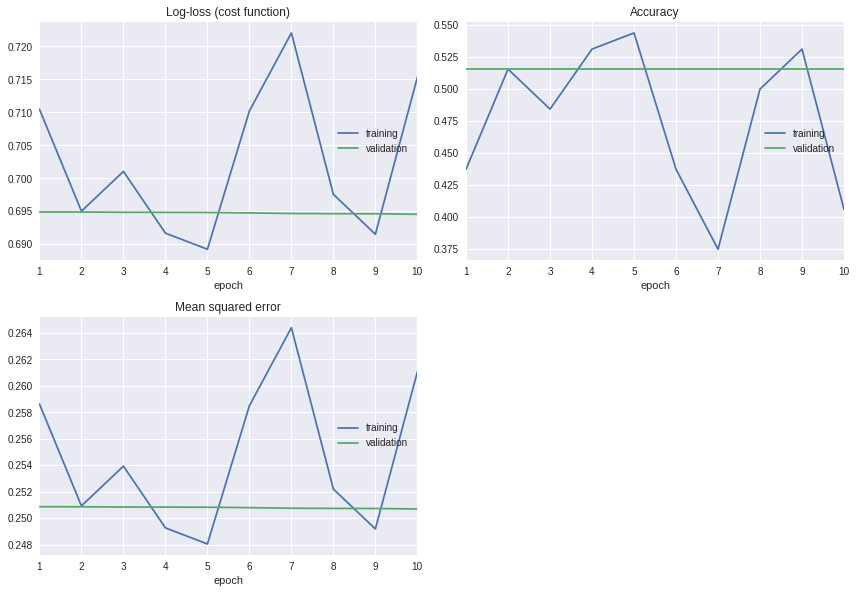

In [40]:
model.fit_generator(train_batches, steps_per_epoch=4, 
                    validation_data=valid_batches, validation_steps=4, callbacks=[plot_losses],
                          epochs=5, verbose=1)

In [0]:
#old model results
#model.fit_generator(train_batches, steps_per_epoch=4, 
#                    validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
2s - loss: 7.6562 - acc: 0.5250 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
2s - loss: 7.6561 - acc: 0.5250 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
2s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/5
2s - loss: 8.4620 - acc: 0.4750 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
2s - loss: 9.2679 - acc: 0.4250 - val_loss: 10.0738 - val_acc: 0.3750


If saving this model with model.save('file.h5'), note that some users have reported the following error when loading the model using load_model('file.h5'):
    
ValueError: Dimension 0 in both shapes must be equal, but are 4096 and 1000.
Shapes are [4096,10] and [1000,10]. for 'Assign_61' (op: 'Assign') with input shapes: [4096,10], [1000,10].
   
If you receive this error, please see the answer in this stackoverflow post:
https://stackoverflow.com/questions/48482483/valueerror-when-loading-a-previously-saved-retrained-vgg16-model-using-keras

## Predict using fine-tuned VGG16 model

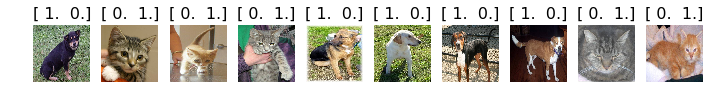

In [0]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [0]:
test_labels = test_labels[:,0]
test_labels

array([ 1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.], dtype=float32)

In [0]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [0]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

Confusion matrix, without normalization
[[4 1]
 [1 4]]


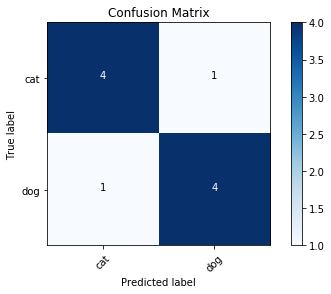

In [0]:
cm_plot_labels = ['food','non-food']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

Confusion matrix, without normalization
[[5 0]
 [5 0]]


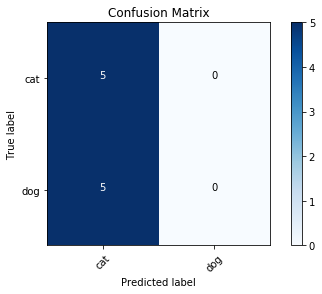

In [0]:
#old model results
cm_plot_labels = ['food','non-food']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')